In [1]:
import os
print(os.listdir("../input"))

['Iris.csv', 'database.sqlite']


### Import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

### Import or upload dataset

In [3]:
iris = pd.read_csv('../input/Iris.csv')

#### Preview of Data

In [4]:
iris.shape

(150, 6)

In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Exploratory Data Analysis (EDA)

In [8]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

#### Data Visualization

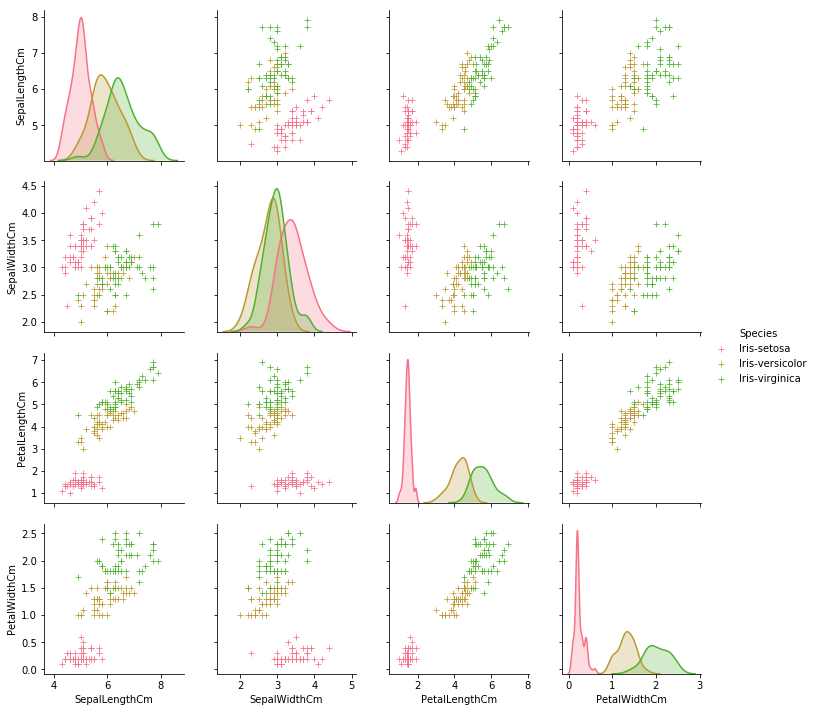

In [11]:
iris1 = iris.drop('Id', axis=1)
g = sns.pairplot(iris1, hue='Species', markers='+')
plt.show()

#### Visualization1 : Sepal Length VS Width


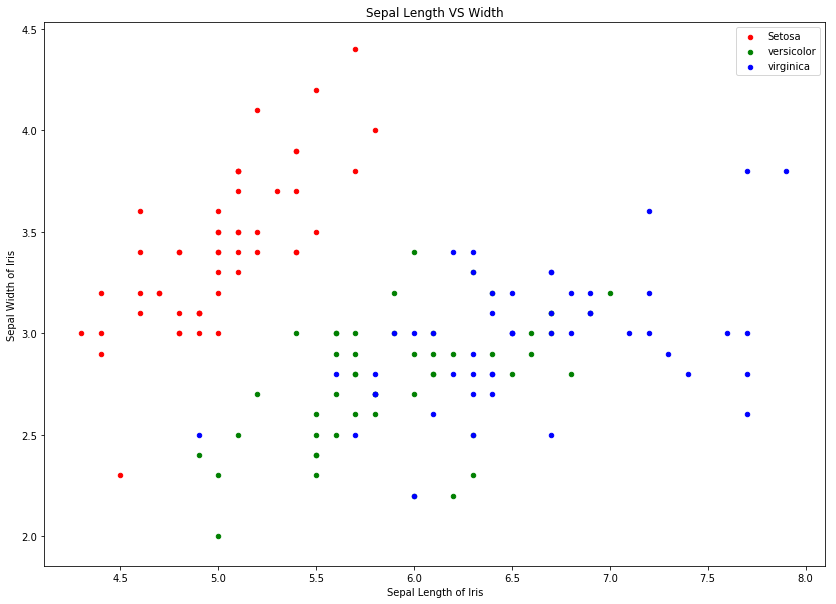

In [12]:
fig = iris1[iris1.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red', label='Setosa')
iris1[iris1.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='versicolor',ax=fig)
iris1[iris1.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length of Iris")
fig.set_ylabel("Sepal Width of Iris")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.show()

#### Visualization2 : Sepal Length VS Width

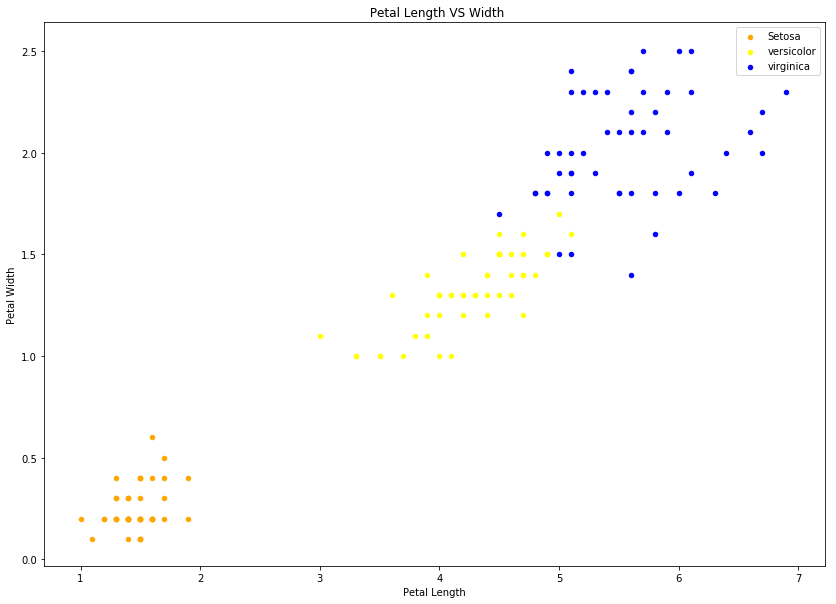

In [13]:
fig = iris1[iris1.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris1[iris1.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='yellow', label='versicolor',ax=fig)
iris1[iris1.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.show()

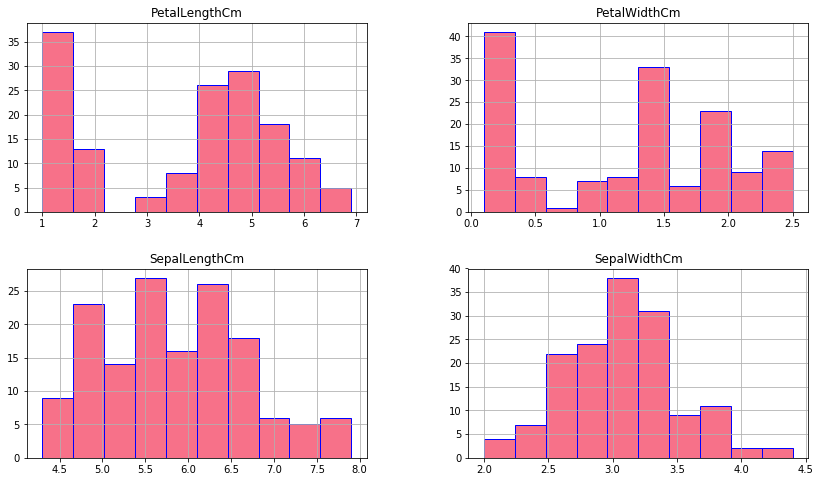

In [14]:
iris1.hist(edgecolor='blue')
fig=plt.gcf()
fig.set_size_inches(14,8)
plt.show()

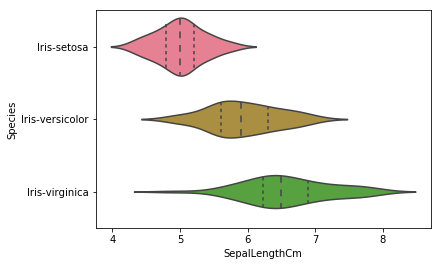

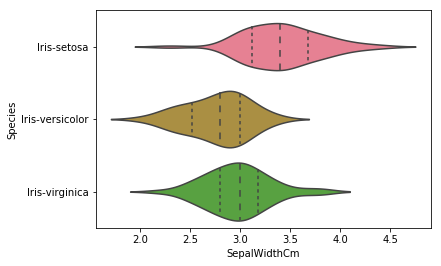

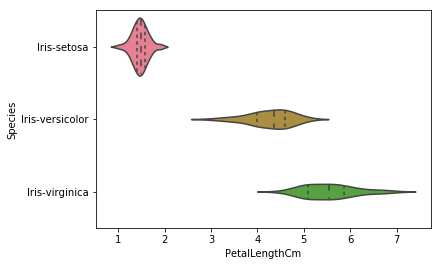

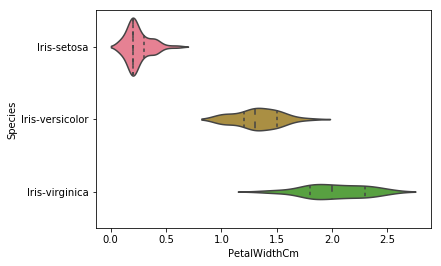

In [15]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=iris1, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=iris1, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=iris1, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=iris1, inner='quartile')
plt.show()

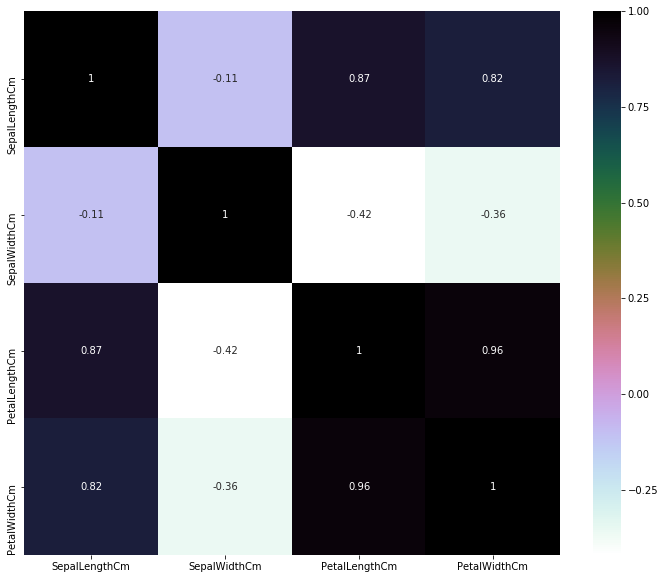

In [16]:
plt.figure(figsize=(12,10)) 
sns.heatmap(iris1.corr(),annot=True,cmap='cubehelix_r')

## Build Model with Scikit-learn

In [17]:
X = iris.drop(['Id', 'Species'], axis=1)
y = iris['Species']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [20]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
32,5.2,4.1,1.5,0.1
52,6.9,3.1,4.9,1.5
70,5.9,3.2,4.8,1.8
121,5.6,2.8,4.9,2.0
144,6.7,3.3,5.7,2.5


In [21]:
X_test.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
87,6.3,2.3,4.4,1.3
111,6.4,2.7,5.3,1.9
10,5.4,3.7,1.5,0.2
91,6.1,3.0,4.6,1.4
49,5.0,3.3,1.4,0.2
60,5.0,2.0,3.5,1.0
72,6.3,2.5,4.9,1.5
67,5.8,2.7,4.1,1.0
39,5.1,3.4,1.5,0.2
55,5.7,2.8,4.5,1.3


In [22]:
y_train.head()

32         Iris-setosa
52     Iris-versicolor
70     Iris-versicolor
121     Iris-virginica
144     Iris-virginica
Name: Species, dtype: object

In [23]:
y_test.head(10)

87     Iris-versicolor
111     Iris-virginica
10         Iris-setosa
91     Iris-versicolor
49         Iris-setosa
60     Iris-versicolor
72     Iris-versicolor
67     Iris-versicolor
39         Iris-setosa
55     Iris-versicolor
Name: Species, dtype: object

In [24]:
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn import metrics

### Logistic Regression

In [25]:
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
acc_log = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the Logistic Regression for Iris Classification Model is', acc_log)

The accuracy of the Logistic Regression for Iris Classification Model is 0.8888888888888888


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Decision Tree

In [26]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc_dt = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the Decision Tree for Iris Classification Model is', acc_dt)

The accuracy of the Decision Tree for Iris Classification Model is 0.9777777777777777


### Support Vector Machine (SVM)

In [27]:
sv = svm.SVC() 
sv.fit(X_train,y_train) 
y_pred = sv.predict(X_test) 
acc_svm = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the SVM for Iris Classification Model is:', acc_svm)

The accuracy of the SVM for Iris Classification Model is: 1.0


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### K-Nearest Neighbours

In [28]:
knc = KNeighborsClassifier(n_neighbors=3) 
knc.fit(X_train,y_train)
y_pred = knc.predict(X_test)
acc_knn = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the KNN for Iris Classification Model is', acc_knn)

The accuracy of the KNN for Iris Classification Model is 0.9777777777777777


([<matplotlib.axis.XTick at 0x78039d51c940>,
 <a list of 10 Text xticklabel objects>)

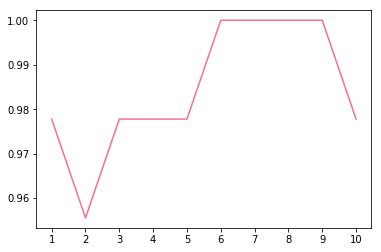

In [29]:
a_index = list(range(1,11))
a = pd.Series()
x = [1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    kcs = KNeighborsClassifier(n_neighbors=i) 
    kcs.fit(X_train,y_train)
    y_pred = kcs.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(y_pred,y_test)))
plt.plot(a_index, a)
plt.xticks(x)

In [30]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machines',
              'K-Nearest Neighbours'],
    'Score': [acc_log, acc_dt, acc_svm, acc_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Support Vector Machines,1.000000
1,Decision Tree,0.977778
3,K-Nearest Neighbours,0.977778
0,Logistic Regression,0.888889
